In [3]:
%cd /Users/gwg/local/dmcm
%matplotlib inline

import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import torch

from   data import GTExConfig, GTExDataset
from   models import LinearVAE
import plotutils

/Users/gwg/local/dmcm


In [4]:
cfg     = GTExConfig()
dataset = GTExDataset(cfg)

In [5]:
LATENT_DIM = 2
LR = 0.001
cfg.LATENT_DIM = LATENT_DIM

fname   = 'experiments/gvae/gtex_dim-%s_lr-%s_epochs-2000' % (LATENT_DIM, LR)
state   = torch.load('%s/model.pt' % fname, map_location={'cuda:0': 'cpu'})
model   = LinearVAE(cfg)
model.load_state_dict(state)

Text(0.5,1,'Test KLD error')

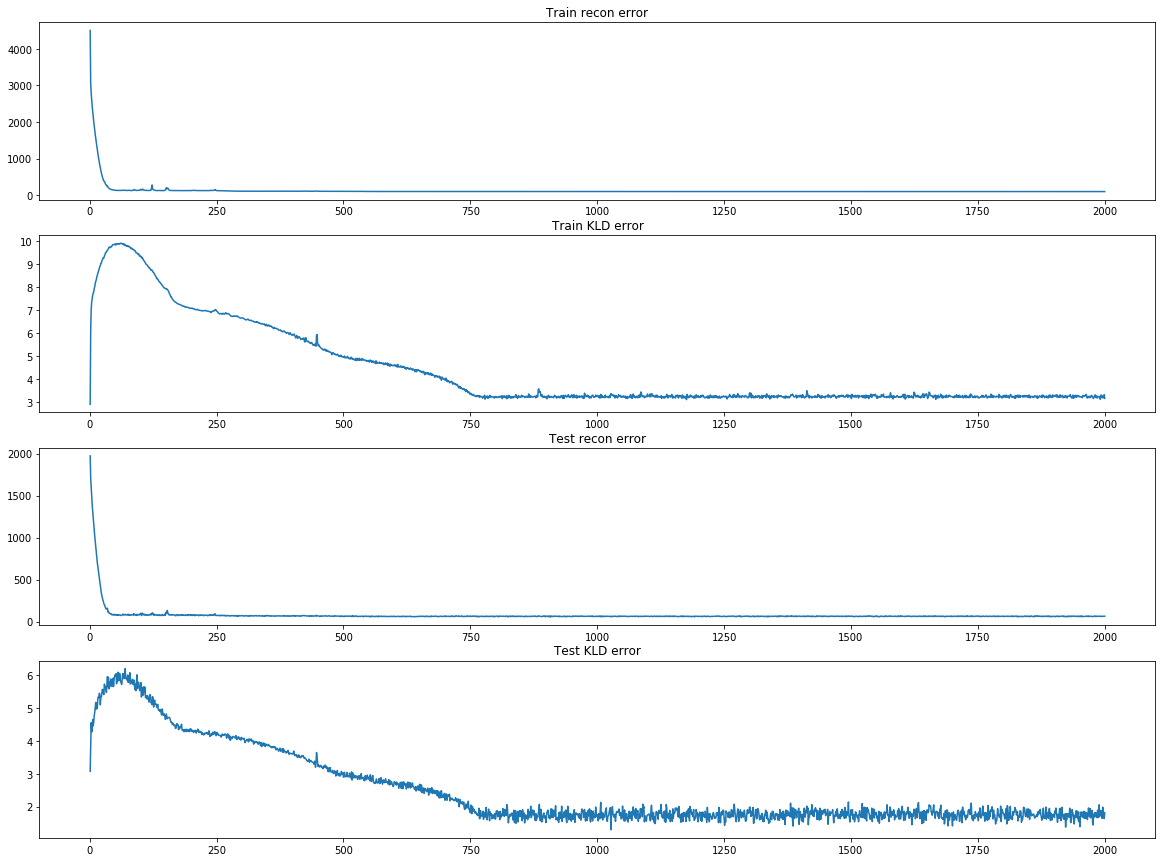

In [6]:
fpath   = '%s/out.txt' % fname
data    = np.array(plotutils.parse_vae_file(fpath))

x      = data[:, 0:1]
rec_tr = data[:, 1:2]
kld_tr = data[:, 2:3]
rec_te = data[:, 3:4]
kld_te = data[:, 4:5]

fig, axs = plt.subplots(4, 1, figsize=(20, 15))

axs[0].plot(x, rec_tr)
axs[0].set_title('Train recon error')

axs[1].plot(x, kld_tr)
axs[1].set_title('Train KLD error')

axs[2].plot(x, rec_te)
axs[2].set_title('Test recon error')

axs[3].plot(x, kld_te)
axs[3].set_title('Test KLD error')

0
250
500
750
1000
1250
1500
1750
2000
Compression mode: None


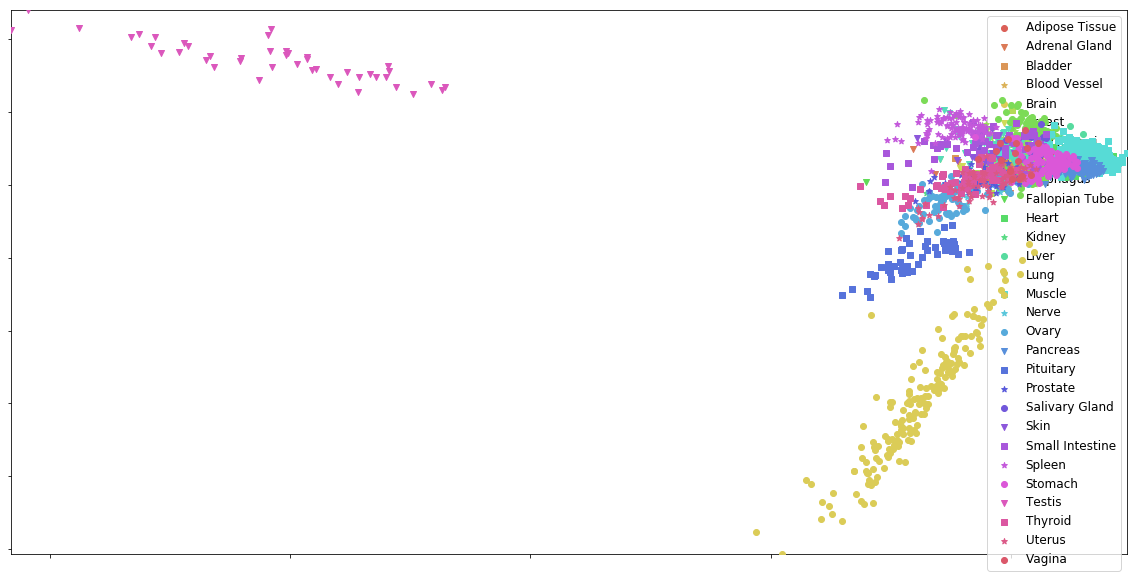

In [7]:
N_SAMPLES   = 2221
N_Zs_PER_X  = 1

X_emb = torch.Tensor(N_SAMPLES, cfg.LATENT_DIM)

for i in range(N_SAMPLES):
    if i % 250 == 0: print(i)
    (_, genes) = dataset[i]
    _, _, mu, _ = model.forward(genes.unsqueeze(0))
    X_emb[i] = mu.detach()

X_emb = X_emb.numpy()
comp_mode = 'pca' if cfg.LATENT_DIM > 2 else None
print('Compression mode: %s' % comp_mode)

dataset.labels = dataset.labels[:N_SAMPLES]
dataset.images = dataset.images[:N_SAMPLES]

plotutils.plot_both_embeddings([X_emb],
                               dataset=dataset, 
                               comp_mode=comp_mode,
                               zoom=0.05,
                               frameon=False)

In [8]:
sample = torch.randn(64, cfg.LATENT_DIM)
sample = model.decode(sample)
genes  = sample.view(64, cfg.N_GENES)